# Generating overall figures for report

In [1]:
import os
os.chdir("/vol/bitbucket/jd123/causal_bayes_opt/results")
from results_utils import summarise_cbo_erdos_results, summarise_erdos20_per_iteration

KeyboardInterrupt: 

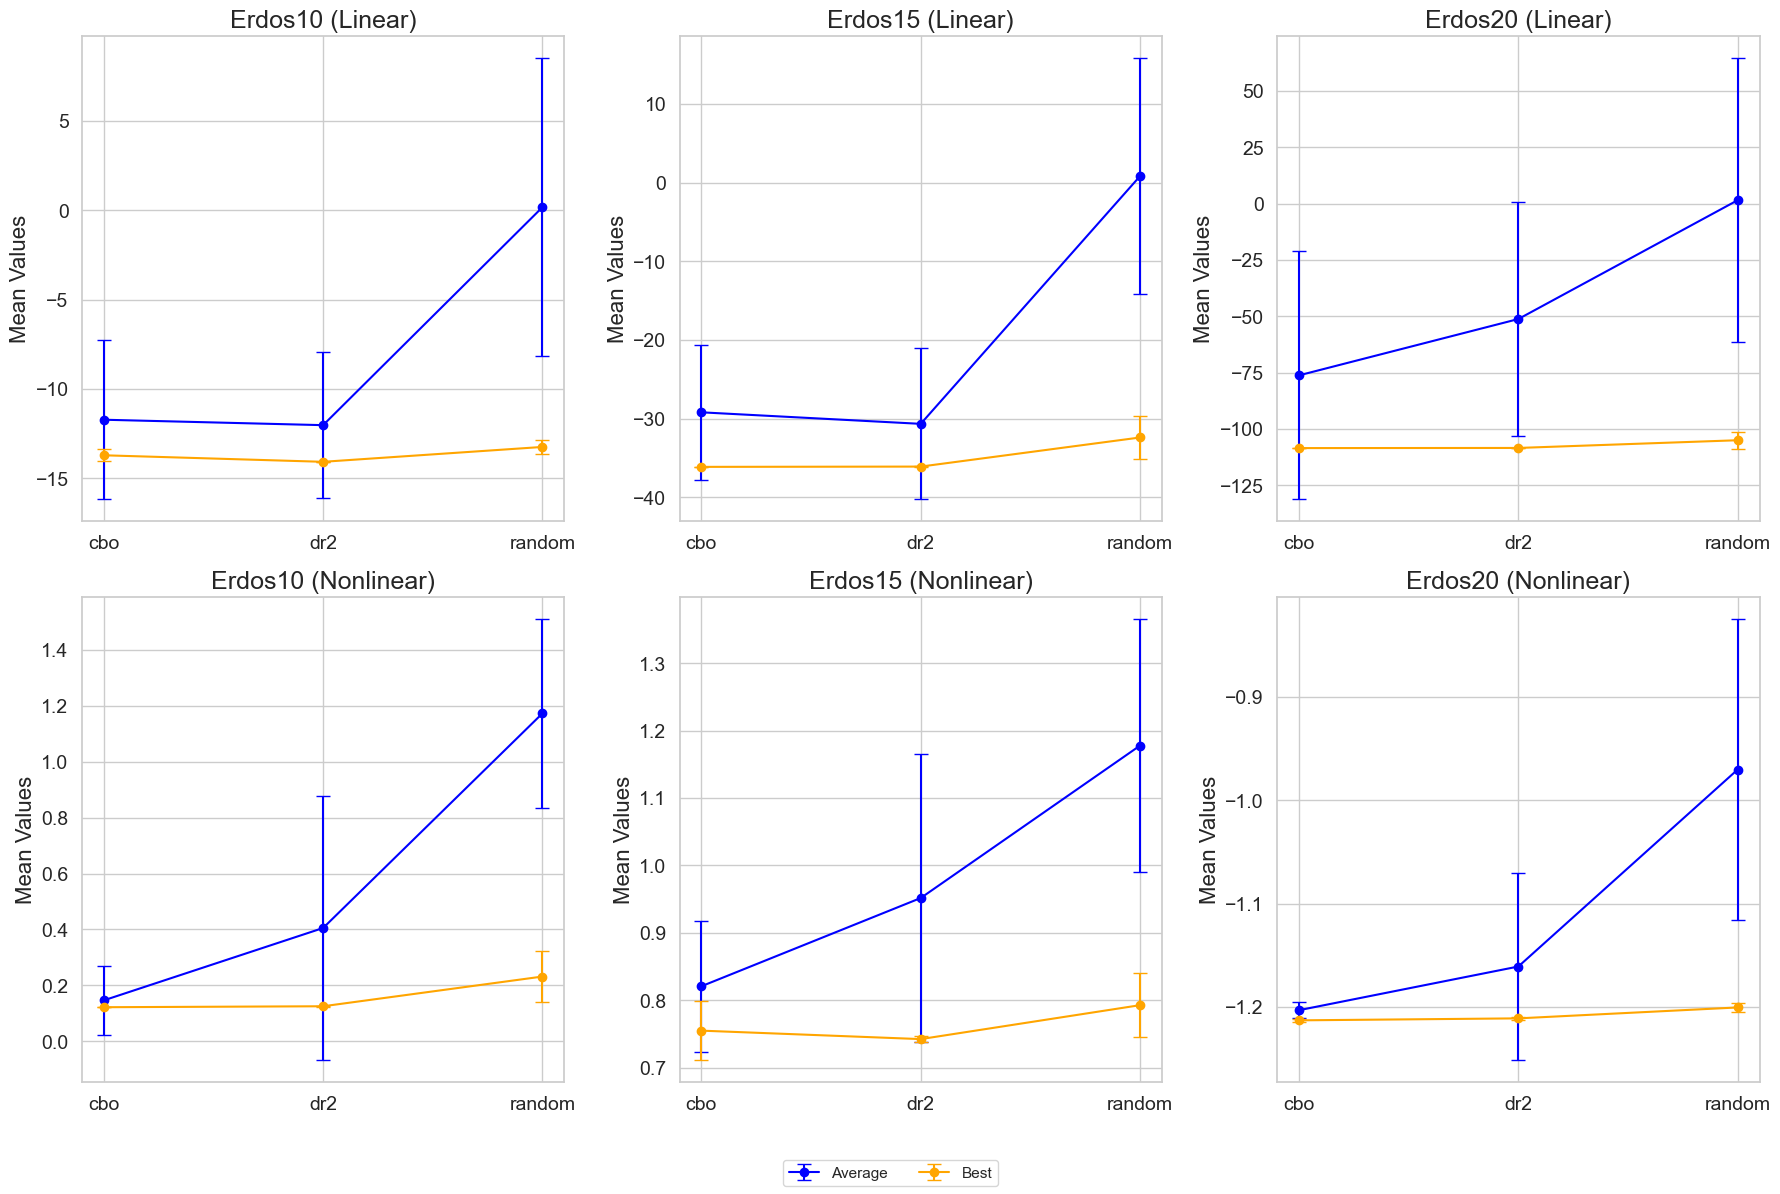

In [ ]:
summarise_cbo_erdos_results()

In [ ]:
# summarise_erdos20_per_iteration()

# Experiment section 2

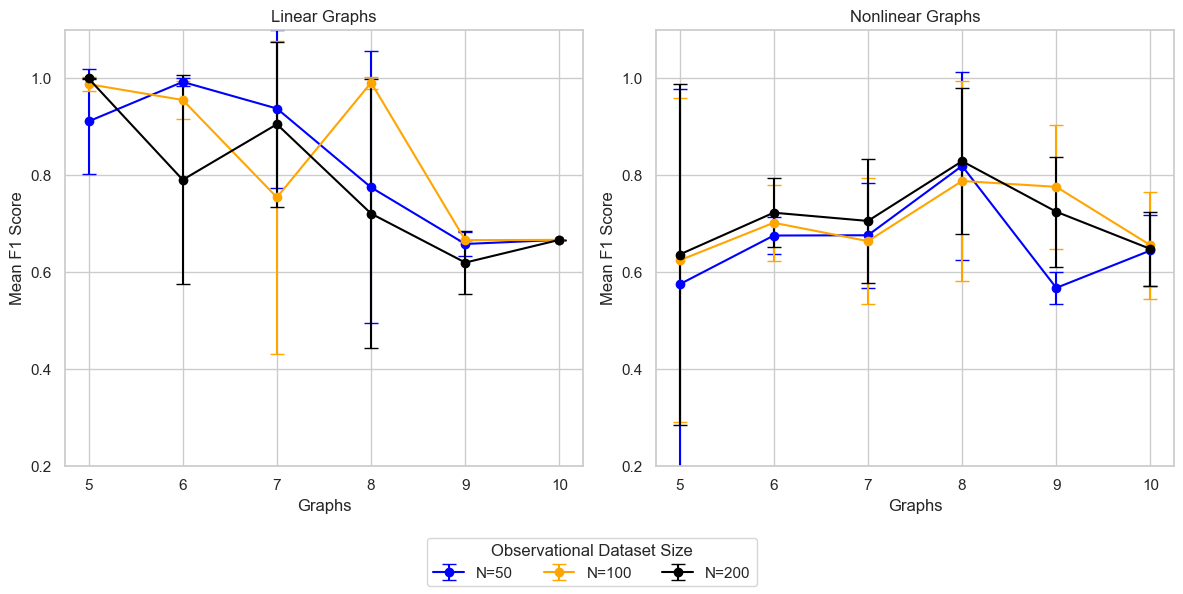

In [ ]:
from results_utils import summarise_n_observational
import os
os.chdir("/vol/bitbucket/jd123/causal_bayes_opt/results/")

summarise_n_observational()

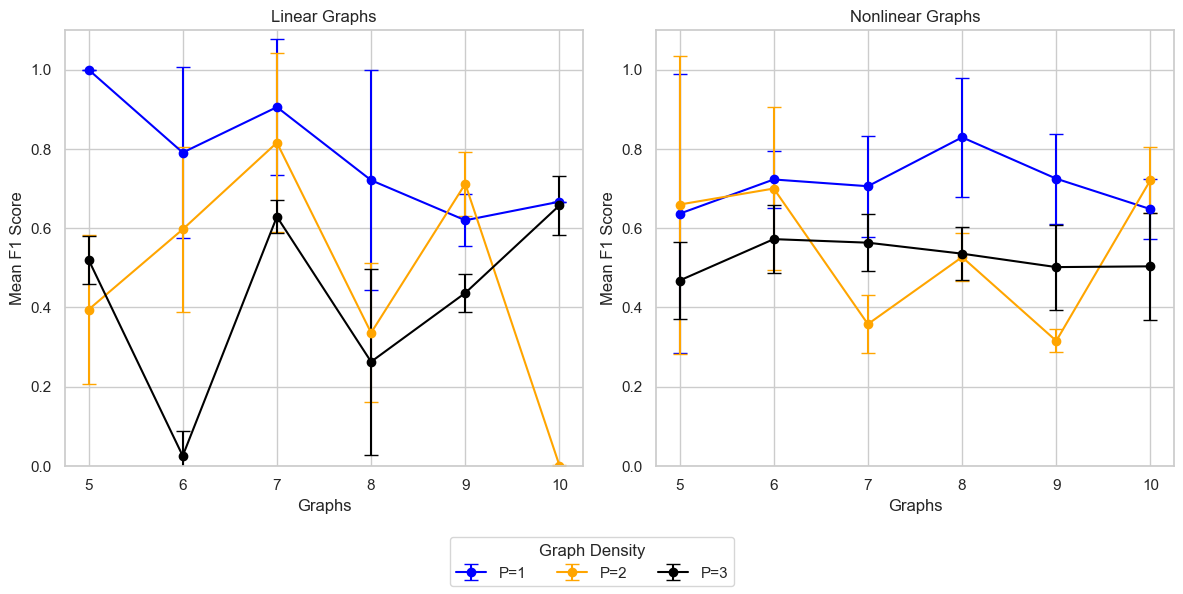

In [ ]:

from results_utils import summarise_p_density
import os
os.chdir("/vol/bitbucket/jd123/causal_bayes_opt/results/")


summarise_p_density()

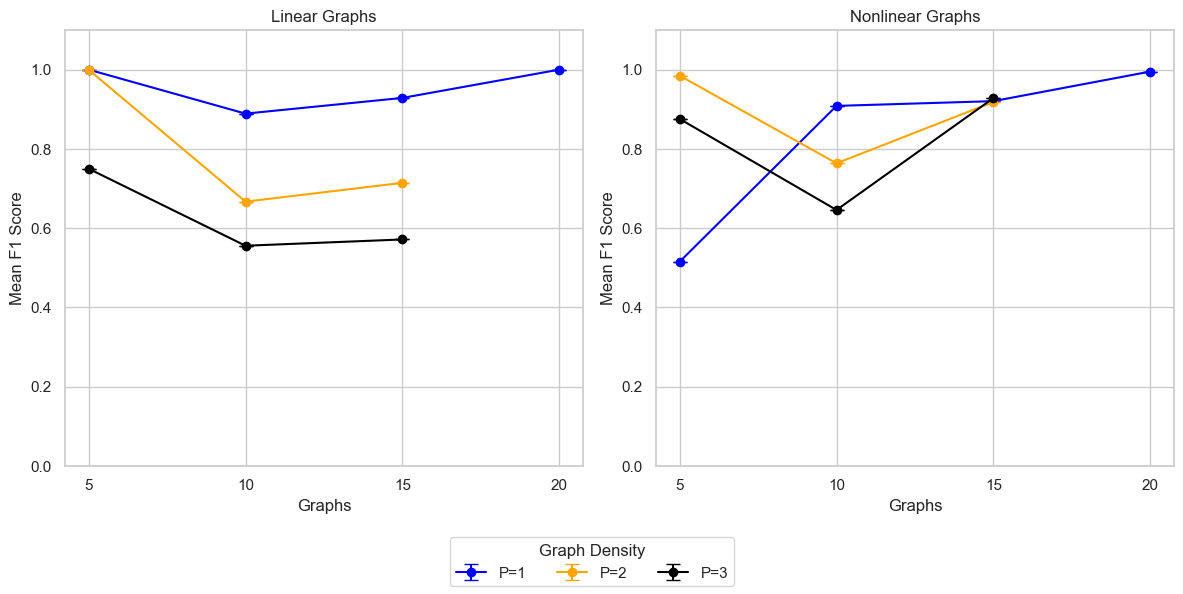

In [ ]:
import os
import seaborn as sns
import matplotlib.pyplot as plt
from result_utils import load_results
import numpy as np
os.chdir("/vol/bitbucket/jd123/causal_bayes_opt/results/")

def summarise_dr_density():
    sns.set_theme(style="whitegrid")
    graphs = [5, 10, 15, 20]
    p_list = [1, 2, 3]
    used_interventions = True
    intervention_string = "_nint" if used_interventions else ""

    # Define colors: blue for P=1, orange for P=2, and black for P=3
    colors = ["blue", "orange", "black"]

    fig, axs = plt.subplots(
        1, 2, figsize=(12, 6)
    )  # Create a figure with 2 subplots side by side

    # Left plot with nonlinear experiment pattern
    for i, p in enumerate(p_list):
        f1_means = []
        f1_stds = []

        for graph in graphs:
            experiment_pattern = (
                rf".*_nonlinear_200_dr_D_1000_p_{p}_noise_"
            )
            all_results = load_results(
                base_path=f"posterior/Erdos{graph}/", regex=experiment_pattern
            )
            final_f1_scores = [result["accuracy"][-1] for result in all_results]
            f1_means.append(np.mean(final_f1_scores))
            f1_stds.append(np.std(final_f1_scores))

        axs[1].errorbar(
            graphs,
            f1_means,
            yerr=f1_stds,
            capsize=5,
            label=f"P={p}",
            marker="o",
            color=colors[i],
        )

    axs[1].set_xlabel("Graphs")
    axs[1].set_ylabel("Mean F1 Score")
    axs[1].set_title("Nonlinear Graphs")
    axs[1].set_xticks(graphs)
    # axs[1].legend(title="Graph Density")
    axs[1].grid(True)

    # Right plot with linear experiment pattern
    for i, p in enumerate(p_list):
        f1_means = []
        f1_stds = []

        for graph in graphs:
            experiment_pattern = (
                rf".*_linear_200_dr_D_1000_p_{p}_noise_"
            )
            all_results = load_results(
                base_path=f"posterior/Erdos{graph}/", regex=experiment_pattern
            )
            final_f1_scores = [result["accuracy"][-1] for result in all_results]
            f1_means.append(np.mean(final_f1_scores))
            f1_stds.append(np.std(final_f1_scores))

        axs[0].errorbar(
            graphs,
            f1_means,
            yerr=f1_stds,
            capsize=5,
            label=f"P={p}",
            marker="o",
            color=colors[i],
        )

    # Set the same limits for both y-axes
    axs[0].set_ylim(0, 1.1)
    axs[1].set_ylim(0, 1.1)
    axs[0].set_xlabel("Graphs")
    axs[0].set_ylabel("Mean F1 Score")
    axs[0].set_title("Linear Graphs")
    axs[0].set_xticks(graphs)
    # axs[0].legend(title="Graph Density")
    axs[0].grid(True)

    # Add a single legend at the bottom
    handles, labels = axs[0].get_legend_handles_labels()
    fig.legend(
        handles,
        labels,
        loc="lower center",
        ncol=len(p_list),
        title="Graph Density",
    )

    plt.tight_layout(rect=[0, 0.1, 1, 1])  # Adjust spacing to prevent overlap
    plt.savefig("graph_density_results")
    plt.show()

summarise_dr_density()

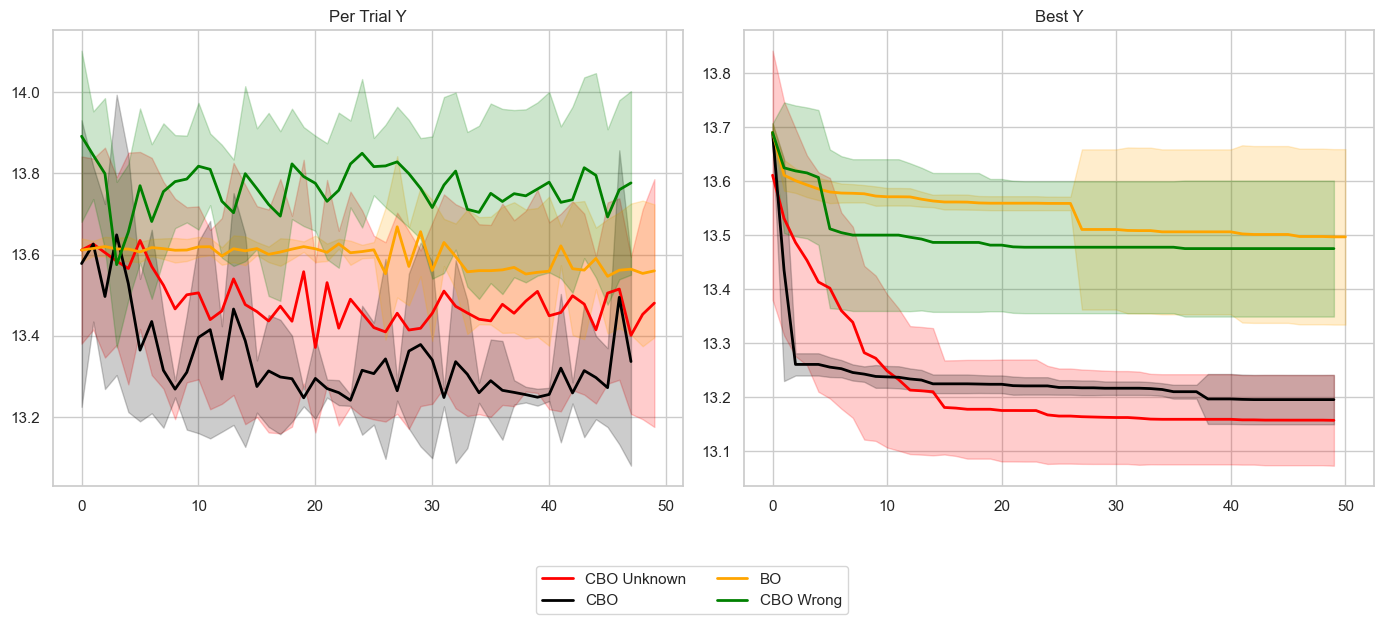

In [4]:
from results_utils import load_results, aggregate_results
import os
import matplotlib.pyplot as plt
import seaborn as sns
os.chdir("/vol/bitbucket/jd123/causal_bayes_opt/results/")

def plot_toy_examples():
    sns.set_theme(style="whitegrid")
    
    # Create a figure with two subplots
    fig, axs = plt.subplots(1, 2, figsize=(14, 6))

    # Plot for the first figure (Per_trial_Y)
    ax = axs[0]
    experiment_pattern = rf".*_cbo_unknown_results_200_2"
    all_results = load_results(base_path=f"Graph6Unknown/", regex=experiment_pattern)
    mean, std = aggregate_results(all_results, "Per_trial_Y")
    x_values = range(len(mean))

    ax.fill_between(x_values, mean - std, mean + std, alpha=0.2, color="Red")
    ax.plot(x_values, mean, label="CBO Unknown", color="Red", linewidth=2)

    experiment_pattern = rf".*_cbo_results_200_2_graph_0"
    all_results = load_results(base_path=f"Graph6/", regex=experiment_pattern)
    mean, std = aggregate_results(all_results, "Per_trial_Y")
    mean = mean[1:]
    std = std[1:]
    x_values = range(len(mean))

    ax.fill_between(x_values, mean - std, mean + std, alpha=0.2, color="Black")
    ax.plot(x_values, mean, label="CBO", color="Black", linewidth=2)

    experiment_pattern = rf".*_bo_results_200_2_"
    all_results = load_results(base_path=f"Graph6/", regex=experiment_pattern)
    mean, std = aggregate_results(all_results, "Per_trial_Y")
    x_values = range(len(mean))

    ax.fill_between(x_values, mean - std, mean + std, alpha=0.2, color="Orange")
    ax.plot(x_values, mean, label="BO", color="Orange", linewidth=2)

    experiment_pattern = rf".*_cbo_results_200_2_graph_4"
    all_results = load_results(base_path=f"Graph6/", regex=experiment_pattern)
    mean, std = aggregate_results(all_results, "Per_trial_Y")
    mean = mean[1:]
    std = std[1:]
    x_values = range(len(mean))

    ax.fill_between(x_values, mean - std, mean + std, alpha=0.2, color="Green")
    ax.plot(x_values, mean, label="CBO Wrong", color="Green", linewidth=2)
    ax.set_title('Per Trial Y')
    # ax.legend()

    # Plot for the second figure (Best_Y)
    ax = axs[1]
    experiment_pattern = rf".*_cbo_unknown_results_200_2"
    all_results = load_results(base_path=f"Graph6Unknown/", regex=experiment_pattern)
    mean, std = aggregate_results(all_results, "Best_Y")
    x_values = range(len(mean))

    ax.fill_between(x_values, mean - std, mean + std, alpha=0.2, color="Red")
    ax.plot(x_values, mean, label="CBO Unknown", color="Red", linewidth=2)

    experiment_pattern = rf".*_cbo_results_200_2_graph_0"
    all_results = load_results(base_path=f"Graph6/", regex=experiment_pattern)
    mean, std = aggregate_results(all_results, "Best_Y")
    mean = mean[1:]
    std = std[1:]
    x_values = range(len(mean))

    ax.fill_between(x_values, mean - std, mean + std, alpha=0.2, color="Black")
    ax.plot(x_values, mean, label="CBO", color="Black", linewidth=2)

    experiment_pattern = rf".*_bo_results_200_2_"
    all_results = load_results(base_path=f"Graph6/", regex=experiment_pattern)
    mean, std = aggregate_results(all_results, "Best_Y")
    x_values = range(len(mean))

    ax.fill_between(x_values, mean - std, mean + std, alpha=0.2, color="Orange")
    ax.plot(x_values, mean, label="BO", color="Orange", linewidth=2)

    experiment_pattern = rf".*_cbo_results_200_2_graph_4"
    all_results = load_results(base_path=f"Graph6/", regex=experiment_pattern)
    mean, std = aggregate_results(all_results, "Best_Y")
    mean = mean[1:]
    std = std[1:]
    x_values = range(len(mean))

    ax.fill_between(x_values, mean - std, mean + std, alpha=0.2, color="Green")
    ax.plot(x_values, mean, label="CBO Wrong", color="Green", linewidth=2)
    ax.set_title('Best Y')
    # ax.legend()

    # Adjust the layout to ensure the plots and legend fit well
    # Create a combined legend
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc="lower center", bbox_to_anchor=(0.5, -0.05), ncol=2)
    # Adjust layout to make space for the legend
    plt.tight_layout(rect=[0, 0.1, 1, 1])

    # Show the combined plot
    plt.savefig("healthcare_pertrial_graphs", bbox_inches='tight')
    plt.show()


plot_toy_examples()

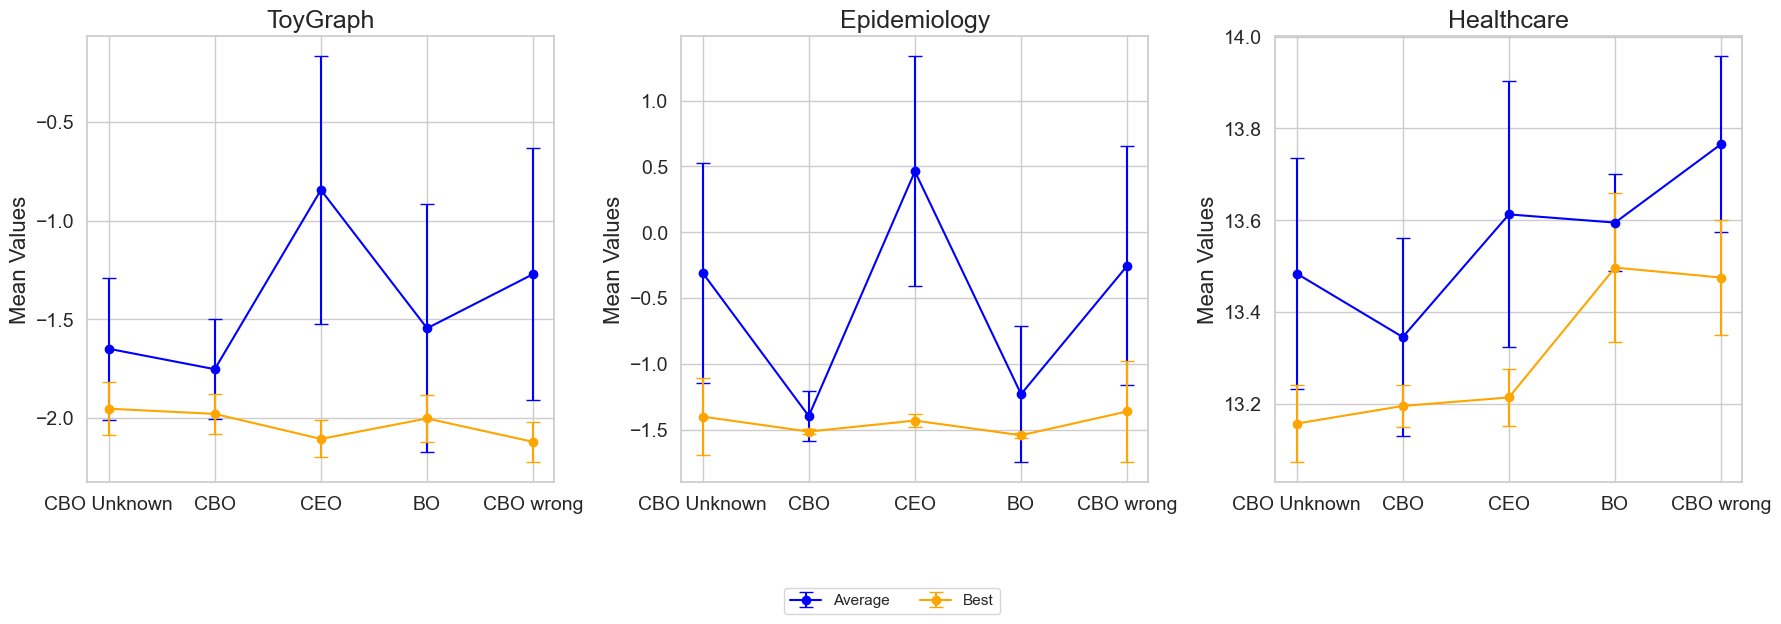

In [2]:
import os
os.chdir("/vol/bitbucket/jd123/causal_bayes_opt/results")
from results_utils import summarise_cbo_toy_results

summarise_cbo_toy_results()